# გადაწყვეტილებათა ხე

In [1]:
# ბიბლიოთეკების გამოძახება
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics  import classification_report
from sklearn.ensemble import RandomForestClassifier
import graphviz

In [2]:
train = pd.read_csv("train.csv")     #  საწვრთნელი მონაცემების წაკითხვა

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train['Age'] = train['Age'].fillna(round(train.Age.mean()))
train['Age'].isnull().sum()

0

In [5]:
print(train.shape)

(891, 12)


In [6]:
# გადავიყვანოთ სქესი: 0 ქალია 1 მამაკაცი
label_encoder = preprocessing.LabelEncoder()
change_sex = label_encoder.fit_transform(train["Sex"])

In [7]:
train["Sex"] = change_sex

# X და Y

In [8]:
X_train = train[train.columns[2:]]
Y_train = train['Survived']

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X_train, Y_train, test_size=0.25)

In [10]:
print(X_train.shape)
print(X_test.shape)

(668, 10)
(223, 10)


In [11]:
print(Y_train.value_counts())
print(Y_test.value_counts())

0    409
1    259
Name: Survived, dtype: int64
0    140
1     83
Name: Survived, dtype: int64


# მოდელის აგება (1 ცვლადი)

In [12]:
# ერთ ცვლადის გადაწყვეტილებათა ხე (სქესი)
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X = pd.DataFrame(X_train['Sex']),
               y = Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

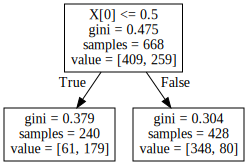

In [13]:
dot_data = tree.export_graphviz(tree_model, out_file=None) 
graph = graphviz.Source(dot_data)  
graph 

In [14]:
Y_preds = tree_model.predict(X = pd.DataFrame(X_test['Sex']))

In [15]:
tree_model.score(pd.DataFrame(X_train['Sex']),Y_train)

0.7889221556886228

In [16]:
tree_model.score(pd.DataFrame(X_test['Sex']),Y_test)

0.7802690582959642

# გადაწყვეტილებათა ხე (2 ცვლადი)

In [17]:
tree_model_2 = tree.DecisionTreeClassifier(#min_samples_leaf = 9,
                                           #max_leaf_nodes = 11,
                                           #max_depth = 7
                                           )

# მოდელის გაწრთვნა
tree_model_2.fit(X = pd.DataFrame(X_train[['Sex','Age']]),
               y = Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

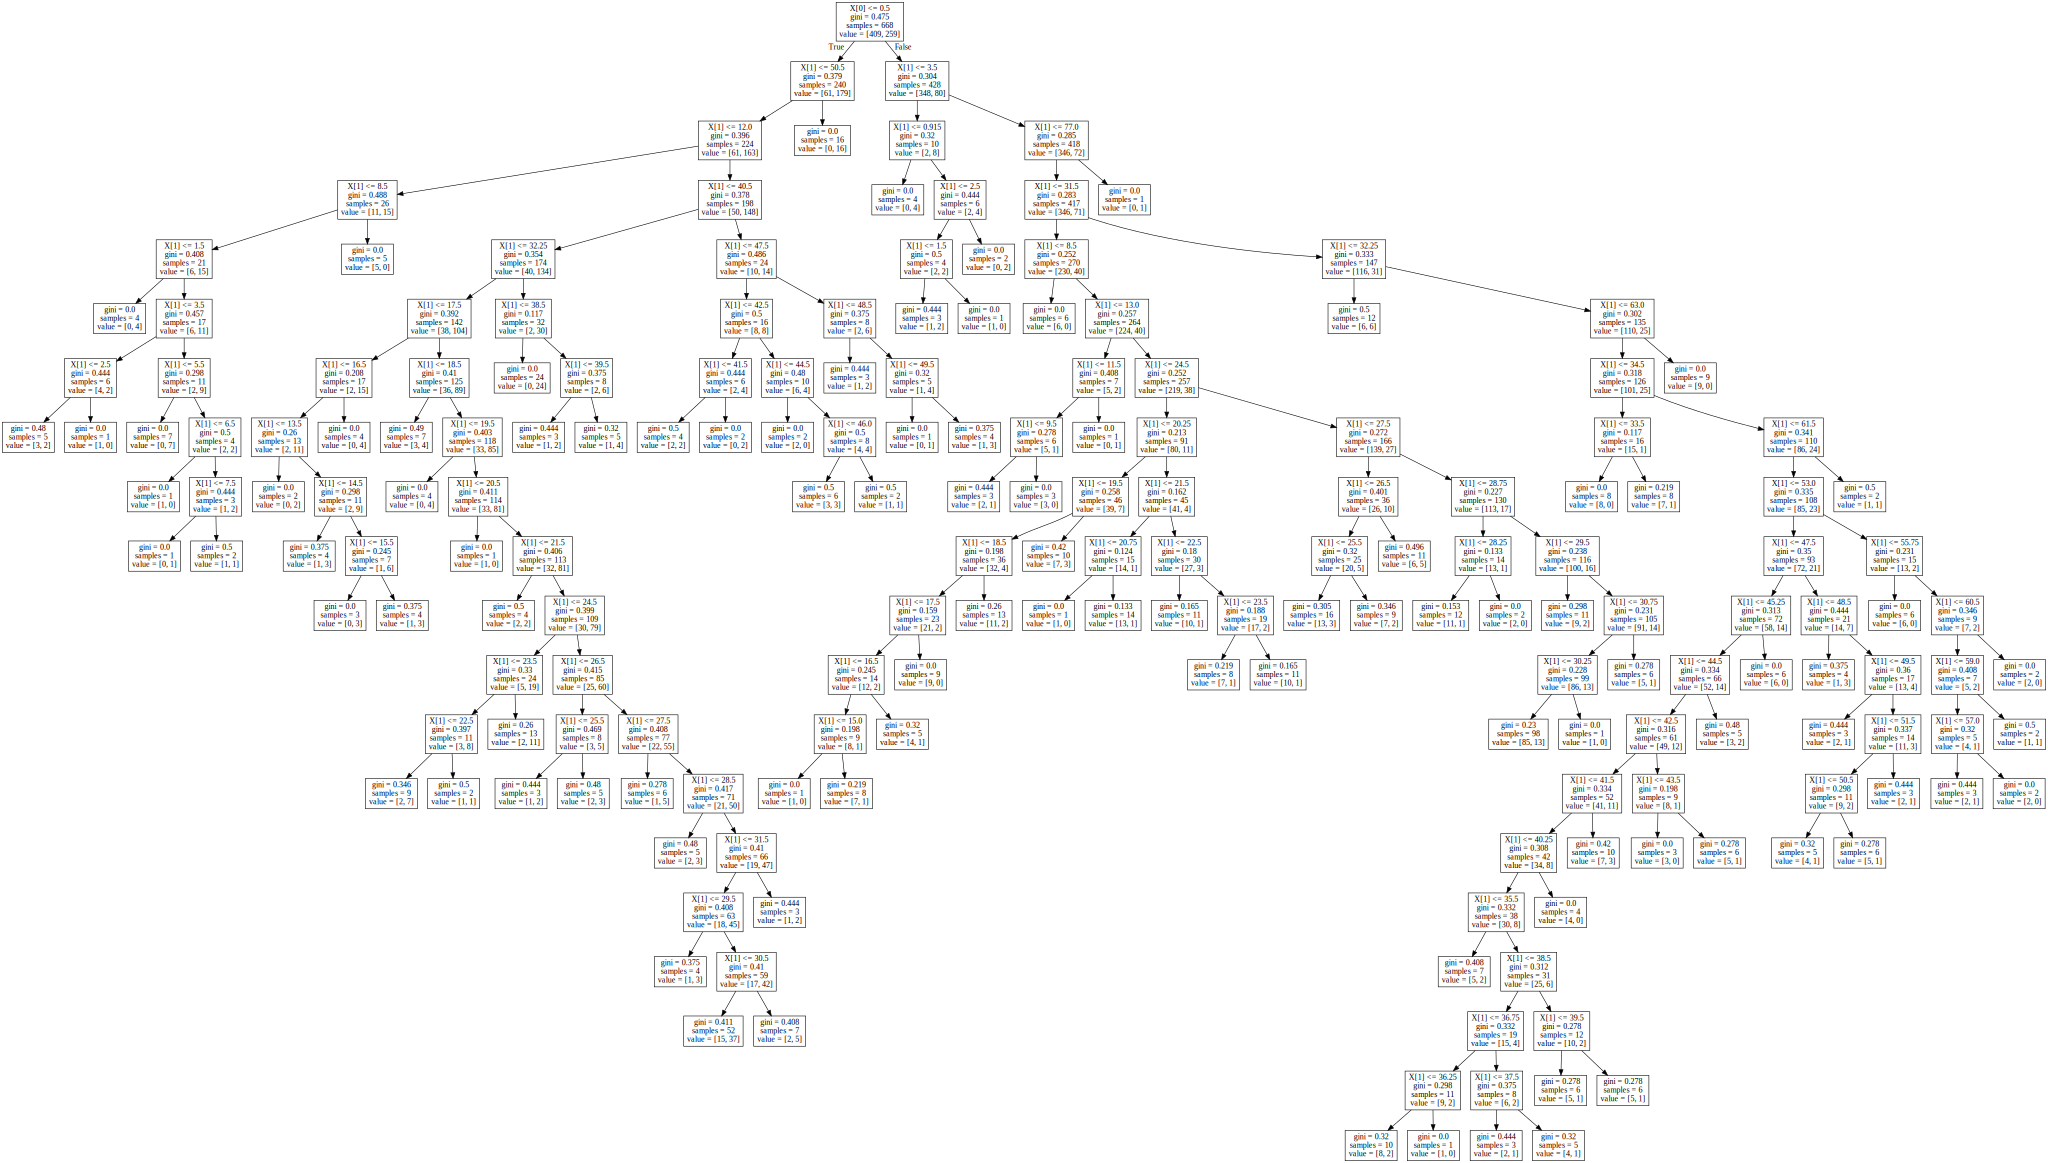

In [18]:
dot_data = tree.export_graphviz(tree_model_2, out_file=None) 
graph = graphviz.Source(dot_data)  
graph 

In [19]:
Y_preds_2 = tree_model_2.predict(X = pd.DataFrame(X_test[['Sex','Age']]))

In [20]:
tree_model_2.score(X_train[['Sex','Age']],Y_train)

0.8218562874251497

In [21]:
tree_model_2.score(X_test[['Sex','Age']],Y_test)

0.7623318385650224

# 6 ცვლადის გადაწყვეტილებათა ხე ჰიპერპარამეტრების მითითებით

In [27]:
# მოდელის განსაზღვრა
tree_model_6 = tree.DecisionTreeClassifier(min_samples_leaf = 7,
                                           max_leaf_nodes = 5,
                                           max_depth = 6
                                           )

# მოდელის გაწრთვნა
tree_model_6.fit(X = pd.DataFrame(X_train[['Sex','Fare','Age','Pclass','SibSp','Parch']]),
               y = Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

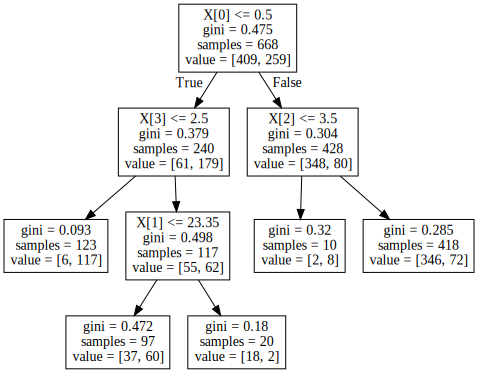

In [28]:
dot_data = tree.export_graphviz(tree_model_6, out_file=None) 
graph = graphviz.Source(dot_data)  
graph 

In [29]:
Y_preds_6 = tree_model_6.predict(X = pd.DataFrame(X_test[['Sex','Fare','Age','Pclass','SibSp','Parch']]))

In [30]:
tree_model_6.score(X_train[['Sex','Fare','Age','Pclass','SibSp','Parch']],Y_train)

0.8218562874251497

In [31]:
tree_model_6.score(X_test[['Sex','Fare','Age','Pclass','SibSp','Parch']],Y_test)

0.8116591928251121

# შემთხვევითი ტყე

In [246]:
rf_1 = RandomForestClassifier( n_estimators = 10,
                            #criterion = 'gini',
                            #max_features = 6,
                            #max_depth =  8,
                            #min_samples_leaf = 3
                              )

In [247]:
rf_1.fit(X_train[['Sex','Fare','Age','Pclass','SibSp','Parch']], Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [248]:
Y_preds_rf_1 = rf_1.predict(X_test[['Sex','Fare','Age','Pclass','SibSp','Parch']])

In [249]:
rf_1.score(X_train[['Sex','Fare','Age','Pclass','SibSp','Parch']],Y_train)

0.9700598802395209

In [250]:
rf_1.score(X_test[['Sex','Fare','Age','Pclass','SibSp','Parch']],Y_test)

0.8430493273542601

In [229]:
rf_2 = RandomForestClassifier(n_estimators = 800,
                            criterion = 'entropy',
                            max_features = 6,
                            max_depth =  8,
                            min_samples_leaf = 3
                              )

In [230]:
rf_2.fit(X_train[['Sex','Fare','Age','Pclass','SibSp','Parch']], Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [231]:
Y_preds_rf_2 = rf_2.predict(X_test[['Sex','Fare','Age','Pclass','SibSp','Parch']])

In [232]:
rf_2.score(X_train[['Sex','Fare','Age','Pclass','SibSp','Parch']],Y_train)

0.8907185628742516

In [233]:
rf_2.score(X_test[['Sex','Fare','Age','Pclass','SibSp','Parch']],Y_test)

0.8340807174887892